In [1]:
# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [5]:
df = pd.read_csv('credit_card_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Let's start by checking the datatype that we have in our dataset:

In [10]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    num_unique_values = df[col].nunique()
    if pd.api.types.is_numeric_dtype(df[col]):
        dtype = f"{BLUE}numerical{RESET}"  # Make "numerical" blue
    else:
        dtype = f"{RED}categorical{RESET}"  # Make "categorical" red

    print(f"Column '{col}' has {num_unique_values} unique {dtype} items")

Column 'CUST_ID' has 8950 unique categorical items
Column 'BALANCE' has 8871 unique numerical items
Column 'BALANCE_FREQUENCY' has 43 unique numerical items
Column 'PURCHASES' has 6203 unique numerical items
Column 'ONEOFF_PURCHASES' has 4014 unique numerical items
Column 'INSTALLMENTS_PURCHASES' has 4452 unique numerical items
Column 'CASH_ADVANCE' has 4323 unique numerical items
Column 'PURCHASES_FREQUENCY' has 47 unique numerical items
Column 'ONEOFF_PURCHASES_FREQUENCY' has 47 unique numerical items
Column 'PURCHASES_INSTALLMENTS_FREQUENCY' has 47 unique numerical items
Column 'CASH_ADVANCE_FREQUENCY' has 54 unique numerical items
Column 'CASH_ADVANCE_TRX' has 65 unique numerical items
Column 'PURCHASES_TRX' has 173 unique numerical items
Column 'CREDIT_LIMIT' has 205 unique numerical items
Column 'PAYMENTS' has 8711 unique numerical items
Column 'MINIMUM_PAYMENTS' has 8636 unique numerical items
Column 'PRC_FULL_PAYMENT' has 47 unique numerical items
Column 'TENURE' has 7 unique n

In [12]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'CUST_ID' has 0 missing values
Column 'BALANCE' has 0 missing values
Column 'BALANCE_FREQUENCY' has 0 missing values
Column 'PURCHASES' has 0 missing values
Column 'ONEOFF_PURCHASES' has 0 missing values
Column 'INSTALLMENTS_PURCHASES' has 0 missing values
Column 'CASH_ADVANCE' has 0 missing values
Column 'PURCHASES_FREQUENCY' has 0 missing values
Column 'ONEOFF_PURCHASES_FREQUENCY' has 0 missing values
Column 'PURCHASES_INSTALLMENTS_FREQUENCY' has 0 missing values
Column 'CASH_ADVANCE_FREQUENCY' has 0 missing values
Column 'CASH_ADVANCE_TRX' has 0 missing values
Column 'PURCHASES_TRX' has 0 missing values
Column 'CREDIT_LIMIT' has 1 missing values
Column 'PAYMENTS' has 0 missing values
Column 'MINIMUM_PAYMENTS' has 313 missing values
Column 'PRC_FULL_PAYMENT' has 0 missing values
Column 'TENURE' has 0 missing values


In [14]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [18]:
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'CUST_ID' has 0 missing values
Column 'BALANCE' has 0 missing values
Column 'BALANCE_FREQUENCY' has 0 missing values
Column 'PURCHASES' has 0 missing values
Column 'ONEOFF_PURCHASES' has 0 missing values
Column 'INSTALLMENTS_PURCHASES' has 0 missing values
Column 'CASH_ADVANCE' has 0 missing values
Column 'PURCHASES_FREQUENCY' has 0 missing values
Column 'ONEOFF_PURCHASES_FREQUENCY' has 0 missing values
Column 'PURCHASES_INSTALLMENTS_FREQUENCY' has 0 missing values
Column 'CASH_ADVANCE_FREQUENCY' has 0 missing values
Column 'CASH_ADVANCE_TRX' has 0 missing values
Column 'PURCHASES_TRX' has 0 missing values
Column 'CREDIT_LIMIT' has 0 missing values
Column 'PAYMENTS' has 0 missing values
Column 'MINIMUM_PAYMENTS' has 0 missing values
Column 'PRC_FULL_PAYMENT' has 0 missing values
Column 'TENURE' has 0 missing values


In [20]:
df[df.duplicated()]  # Putting the result into a new dataframe for clarity, there's no duplicated data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [22]:
original_df = df.copy()

In [24]:
df.drop('CUST_ID', axis = 1, inplace = True)

#### Since there are so many columns, making a pairplot in order to visually detect the outliers in the dataset is not an option. In order to detect the possible outliers, we will be using the Isolation Forest Method. 

#### This method is an unsupervised machine learning algorithm designed for anomaly detection, and it isolates observations by randomly selecting features and splitting the data. Outliers are isolated quickly and therefore have shorter path lengths in the tree structure.

In [36]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators = 100, contamination = 0.01, random_state = 19)

outlier_labels = iso_forest.fit_predict(df)
df = df[outlier_labels == 1]
df = df.reset_index(drop = True)

## Clustering

#### We will start by scaling the dataset:

In [45]:
non_scaled_df = df.copy()      # Let's make a copy of the original dataset so we can compare the clusters with the original features later

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df)
new_df = pd.DataFrame(data = X, columns = df.columns)
new_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744152,-0.244311,-0.537573,-0.459925,-0.374948,-0.505365,-0.798314,-0.672295,-0.700617,-0.676531,-0.485706,-0.538118,-0.968793,-0.601765,-0.322085,-0.523124,0.361275
1,0.855141,0.138073,-0.601825,-0.459925,-0.501645,3.023158,-1.214231,-0.672295,-0.911044,0.597511,0.136121,-0.628867,0.736137,1.099109,0.117192,0.240191,0.361275
2,0.497341,0.520457,-0.081095,0.229017,-0.501645,-0.505365,1.281270,2.726843,-0.911044,-0.676531,-0.485706,-0.084377,0.878214,-0.418536,-0.092388,-0.523124,0.361275
3,0.078251,-1.009080,0.407751,0.875777,-0.501645,-0.392664,-1.006274,-0.389035,-0.911044,-0.251852,-0.330249,-0.583493,0.878214,-0.689747,0.019180,-0.523124,0.361275
4,-0.351197,0.520457,-0.591049,-0.445668,-0.501645,-0.505365,-1.006274,-0.389035,-0.911044,-0.676531,-0.485706,-0.583493,-0.911962,-0.394004,-0.272507,-0.523124,0.361275


#### The next step consists in reducing the dimensions of the dataset. We will use PCA for this purpose, using 2 variables:

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(new_df)
df_pca = pd.DataFrame(pca.transform(new_df), columns = (['col1', 'col2']))
df_pca.head()

,col1,col2
0,-1.430345,-1.591745
1,-1.937906,2.403867
2,1.185591,0.063604
3,-0.691741,-0.166024
4,-1.449818,-1.145712


Text(0, 0.5, 'PCA2 (col2)')

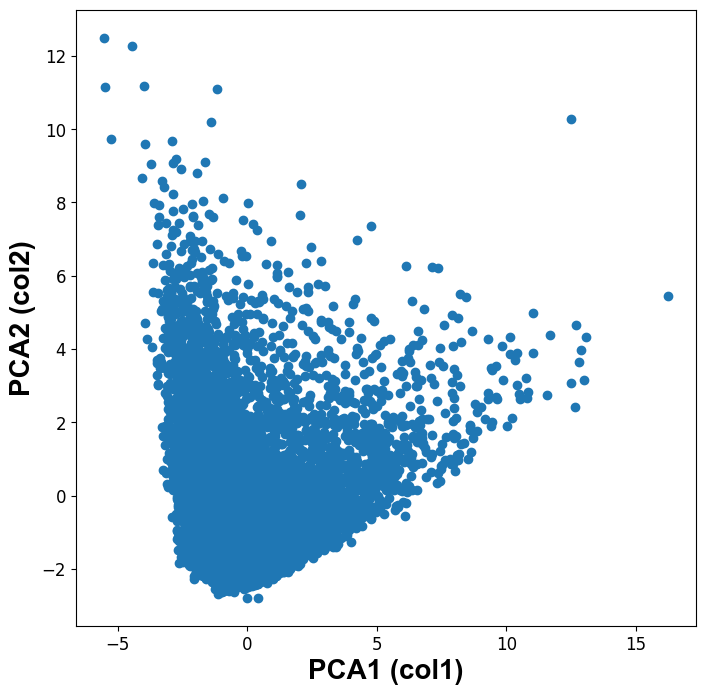

In [50]:
plt.figure(figsize = (8, 8))
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.scatter(df_pca['col1'], df_pca['col2'])
plt.xlabel('PCA1 (col1)', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('PCA2 (col2)', fontsize = 20, fontweight='bold', **csfont)

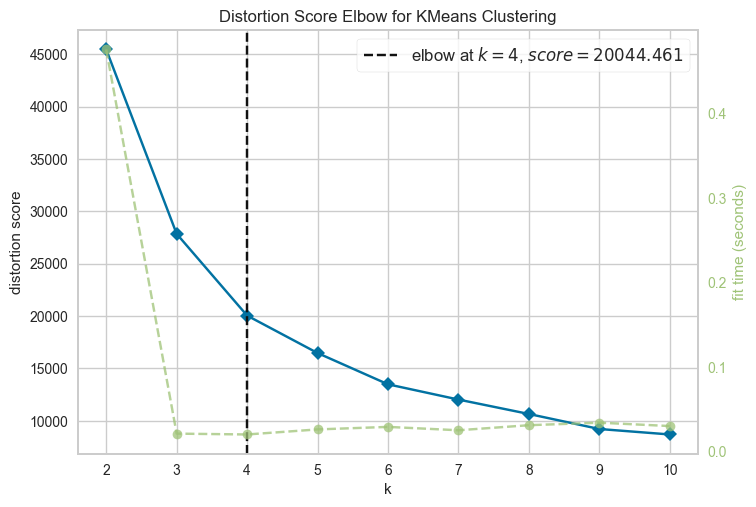

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

#### Now that we know that the optimal number of clusters is 4, we can perform the clustering process:

In [61]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 4)
y_pred = ac.fit_predict(df_pca)
df_pca['Clusters'] = y_pred
non_scaled_df['Clusters'] = y_pred
df_pca.head()

,col1,col2,Clusters
0,-1.430345,-1.591745,2
1,-1.937906,2.403867,1
2,1.185591,0.063604,3
3,-0.691741,-0.166024,2
4,-1.449818,-1.145712,2


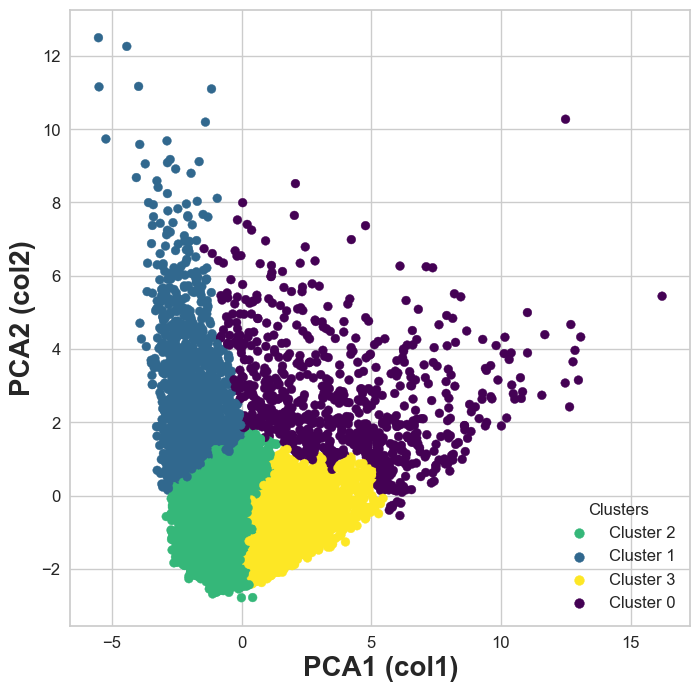

In [63]:
plt.figure(figsize = (8, 8))
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.scatter(df_pca['col1'], df_pca['col2'], s = 40, c = df_pca['Clusters'], cmap = 'viridis')
plt.xlabel('PCA1 (col1)', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('PCA2 (col2)', fontsize = 20, fontweight='bold', **csfont)
unique_clusters = df_pca['Clusters'].unique()

for cluster in unique_clusters:
    plt.scatter([], [], color=plt.cm.viridis(cluster / df_pca['Clusters'].max()), label=f'Cluster {cluster}')

plt.legend(title='Clusters', fontsize=12)